In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'C:\Users\FLUTE\Dropbox\Project\TPPS_Perf.xlsx')

In [4]:
df.head()

MW   Station     Months      MUG       PLFC    AFC          L   PLFM  \
0  420  Bhusawal 2011-04-30  237.404  78.506614  95.97  81.803286  84.14   
1  420  Bhusawal 2011-05-31  213.522  68.331413  86.72  78.795449  70.60   
2  420  Bhusawal 2011-06-30  227.244  75.146825  94.37  79.629994  76.96   
3  420  Bhusawal 2011-07-31  170.155  54.453085  73.88  73.704771  56.68   
4  420  Bhusawal 2011-08-31  138.150  44.210829  76.64  57.686364  46.23   

    AVFM  Oil Cons  ...   SLOC     MUL   R1  R11      R2   R3   R4      AC  \
0  84.14  Oil Cons  ...  0.019   0.000  0.0  0.0   0.000  0.0  0.0  24.041   
1  70.60  Oil Cons  ...  0.032   0.000  0.0  0.0   0.000  0.0  0.0  23.096   
2  76.96  Oil Cons  ...  0.027   0.000  0.0  0.0   0.000  0.0  0.0  24.248   
3  56.68  Oil Cons  ...  0.038  12.955  0.0  0.0  12.955  0.0  0.0  19.951   
4  46.23  Oil Cons  ...  0.042  52.728  0.0  0.0  52.728  0.0  0.0  19.434   

         PAC       NG  
0  10.126620  213.363  
1  10.816684  190.426  
2  10.670469  202.996  
3  11.725192  150.204  
4  14.067318  118.716  

[5 rows x 45 columns]

In [5]:
df1=df[['MW', 'MUG', 'PLFC','AFC', 'L','PLFM','AVFM','Total','SOC','TOC','FO','PO','RSD',
                 'CR', 'CC','SCC', 'GCV', 'HR', 'TL', 'SRWC', 'SFWC', 'SDWC', 'SLOC', 'MUL','AC', 'PAC', 'NG']]

In [3]:
from factor_analyzer import FactorAnalyzer

# Adequacy Test

    Bartlett’s Test
    Kaiser-Meyer-Olkin Test


In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(28257.28733605932, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)

In [8]:
kmo_model

0.6979285805320502

Just pass the dataframe which contains information about the dataset to the calculate_kmo function. The function will return the proportion of variance for each variable which is stored in the variable ‘kmo_all’ and the proportion of variance for the whole of our data is stored in ‘kmo_model’. we can see that our data has an overall proportion of variance of 0.69. It shows that our data has more correlation and dimensionality reduction techniques such as the factor analysis can be applied.

# Choosing no. of factors

In [9]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df1.shape[1])
fa

FactorAnalyzer(impute='drop', n_factors=27, rotation=None)

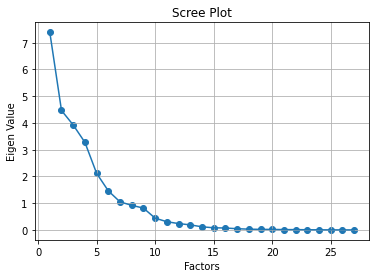

In [10]:
fa.fit(df1)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df1.shape[1]+1),ev)
plt.plot(range(1,df1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

# INTERPRETING THE FACTORS
From the graph, we can see that the eigenvalues drop below 1 from the 3rd factor. So, the optimal number of factors is 2.
Create an optimal number of factors i.e. 6 in our case. Then, we have to interpret the factors by making use of loadings, variance, and commonalities.

# LOADINGS

In [19]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df1)
print(pd.DataFrame(fa.loadings_,index=df1.columns))

              0         1         2         3         4         5
MW    -0.226563  0.943292  0.037279  0.098359  0.124229  0.009057
MUG    0.194151  0.952201 -0.050913 -0.008687  0.137705  0.142336
PLFC   0.777837  0.159963 -0.124608 -0.155008  0.029103  0.576233
AFC    0.784830  0.161725 -0.066726  0.099551  0.047740  0.525251
L      0.845531  0.143861  0.016630 -0.294816  0.016873  0.029216
PLFM   0.724077  0.150878 -0.001614 -0.210091  0.018516  0.568985
AVFM   0.710153  0.156971  0.009049 -0.225324  0.030334  0.593563
Total -0.027926  0.172947  0.018043  0.960634 -0.022339 -0.082328
SOC   -0.055599 -0.166742  0.048591  0.811053 -0.008668 -0.302827
TOC   -0.042759  0.194418  0.021948  0.935225 -0.012691 -0.092649
FO     0.075201 -0.104199 -0.018927  0.105375  0.023764 -0.311356
PO    -0.058780 -0.059367  0.117011  0.094731 -0.026652 -0.562079
RSD   -0.876586 -0.120304  0.017829 -0.174754 -0.054841  0.025094
CR     0.309037  0.091760 -0.014361 -0.097143 -0.178036  0.133613
CC     0.1

In [20]:
L=pd.DataFrame(fa.loadings_,index=df1.columns)
print(L.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 &         5 \\
\midrule
MW    & -0.226563 &  0.943292 &  0.037279 &  0.098359 &  0.124229 &  0.009057 \\
MUG   &  0.194151 &  0.952201 & -0.050913 & -0.008687 &  0.137705 &  0.142336 \\
PLFC  &  0.777837 &  0.159963 & -0.124608 & -0.155008 &  0.029103 &  0.576233 \\
AFC   &  0.784830 &  0.161725 & -0.066726 &  0.099551 &  0.047740 &  0.525251 \\
L     &  0.845531 &  0.143861 &  0.016630 & -0.294816 &  0.016873 &  0.029216 \\
PLFM  &  0.724077 &  0.150878 & -0.001614 & -0.210091 &  0.018516 &  0.568985 \\
AVFM  &  0.710153 &  0.156971 &  0.009049 & -0.225324 &  0.030334 &  0.593563 \\
Total & -0.027926 &  0.172947 &  0.018043 &  0.960634 & -0.022339 & -0.082328 \\
SOC   & -0.055599 & -0.166742 &  0.048591 &  0.811053 & -0.008668 & -0.302827 \\
TOC   & -0.042759 &  0.194418 &  0.021948 &  0.935225 & -0.012691 & -0.092649 \\
FO    &  0.075201 & -0.104199 & -0.018927 &  0.105375 &  0.023764 & -

# VARIANCE

In [21]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))
v=pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

                         0         1         2         3         4         5
Variance          5.944950  4.813312  3.345224  2.838139  2.595197  2.247860
Proportional Var  0.220183  0.178271  0.123897  0.105116  0.096118  0.083254
Cumulative Var    0.220183  0.398454  0.522351  0.627468  0.723586  0.806840


In [22]:
print(v.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 &         5 \\
\midrule
Variance         &  5.944950 &  4.813312 &  3.345224 &  2.838139 &  2.595197 &  2.247860 \\
Proportional Var &  0.220183 &  0.178271 &  0.123897 &  0.105116 &  0.096118 &  0.083254 \\
Cumulative Var   &  0.220183 &  0.398454 &  0.522351 &  0.627468 &  0.723586 &  0.806840 \\
\bottomrule
\end{tabular}



# COMMUNALITIES

In [23]:
print(pd.DataFrame(fa.get_communalities(),index=df1.columns,columns=['Communalities']))
c=pd.DataFrame(fa.get_communalities(),index=df1.columns,columns=['Communalities'])

       Communalities
MW          0.967709
MUG         0.986271
PLFC        1.003064
AFC         0.934644
L           0.823950
PLFM        0.915279
AVFM        0.933047
Total       0.961111
SOC         0.782841
TOC         0.923498
FO          0.125482
PO          0.346288
RSD         0.817370
CR          0.163116
CC          0.979759
SCC         0.990658
GCV         0.845972
HR          0.831525
TL          0.993756
SRWC        0.349453
SFWC        0.888576
SDWC        0.942904
SLOC        0.638112
MUL         0.692672
AC          0.972376
PAC         0.985494
NG          0.989752


    Variables with communalities above 0.7 (or a threshold you set) indicate a strong representation of the variable by the factors. For example, variables like MW, MUG, PLFC, AFC, PLFM, AVFM, SOC, TOC, CC, SCC, GCV, HR, TL, SFWC, SDWC, SLOC, AC, PAC, and NG have communalities above 0.7.

    Variables with communalities below 0.7 may have weaker representation by the factors and might not contribute as much to the overall analysis. For example, variables like L, FO, PO, RSD, CR, and SRWC have communalities below 0.7.

In [24]:
print(c.to_latex())

\begin{tabular}{lr}
\toprule
{} &  Communalities \\
\midrule
MW    &       0.967709 \\
MUG   &       0.986271 \\
PLFC  &       1.003064 \\
AFC   &       0.934644 \\
L     &       0.823950 \\
PLFM  &       0.915279 \\
AVFM  &       0.933047 \\
Total &       0.961111 \\
SOC   &       0.782841 \\
TOC   &       0.923498 \\
FO    &       0.125482 \\
PO    &       0.346288 \\
RSD   &       0.817370 \\
CR    &       0.163116 \\
CC    &       0.979759 \\
SCC   &       0.990658 \\
GCV   &       0.845972 \\
HR    &       0.831525 \\
TL    &       0.993756 \\
SRWC  &       0.349453 \\
SFWC  &       0.888576 \\
SDWC  &       0.942904 \\
SLOC  &       0.638112 \\
MUL   &       0.692672 \\
AC    &       0.972376 \\
PAC   &       0.985494 \\
NG    &       0.989752 \\
\bottomrule
\end{tabular}



In [14]:
df2=df1[['MW', 'MUG', 'PLFC', 'AFC', 'PLFM', 'AVFM', 'SOC', 'TOC', 'CC', 'SCC', 
         'GCV', 'HR', 'TL', 'SFWC', 'SDWC', 'SLOC', 'AC', 'PAC', 'NG']]
df1

MW      MUG       PLFC    AFC          L   PLFM   AVFM   Total  \
0     420  237.404  78.506614  95.97  81.803286  84.14  84.14   583.0   
1     420  213.522  68.331413  86.72  78.795449  70.60  70.60   687.0   
2     420  227.244  75.146825  94.37  79.629994  76.96  76.96   627.0   
3     420  170.155  54.453085  73.88  73.704771  56.68  56.68   811.0   
4     420  138.150  44.210829  76.64  57.686364  46.23  46.23  2302.0   
..    ...      ...        ...    ...        ...    ...    ...     ...   
428  1130    0.000   0.000000   0.00   0.000000   0.00   0.00     0.0   
429  1130    0.000   0.000000   0.00   0.000000   0.00   0.00     0.0   
430  1130    0.000   0.000000   0.00   0.000000   0.00   0.00     0.0   
431  1130    0.000   0.000000   0.00   0.000000   0.00   0.00     0.0   
432  1130    0.000   0.000000   0.00   0.000000   0.00   0.00     0.0   

           SOC   TOC  ...      HR    TL  SRWC  SFWC  SDWC   SLOC      MUL  \
0     2.455729  1.59  ...  2725.0  1.64  5.88  2.20  0.08  0.019    0.000   
1     3.217467  1.91  ...  2756.0  1.03  4.76  2.38  0.11  0.032    0.000   
2     2.759149  1.70  ...  2729.0  1.58  4.42  2.13  0.09  0.027    0.000   
3     4.766243  3.25  ...  2730.0  1.24  5.00  2.48  0.14  0.038   12.955   
4    16.663047  8.93  ...  3000.0  1.29  5.00  2.68  0.17  0.042   52.728   
..         ...   ...  ...     ...   ...   ...   ...   ...    ...      ...   
428   0.000000  0.00  ...     0.0  0.00  0.00  0.00  0.00  0.000  840.720   
429   0.000000  0.00  ...     0.0  0.00  0.00  0.00  0.00  0.000  813.600   
430   0.000000  0.00  ...     0.0  0.00  0.00  0.00  0.00  0.000  840.720   
431   0.000000  0.00  ...     0.0  0.00  0.00  0.00  0.00  0.000  786.480   
432   0.000000  0.00  ...     0.0  0.00  0.00  0.00  0.00  0.000  840.720   

            AC        PAC          NG  
0    24.041000  10.126620  213.363000  
1    23.096000  10.816684  190.426000  
2    24.248000  10.670469  202.996000  
3    19.951000  11.725192  150.204000  
4    19.434000  14.067318  118.716000  
..         ...        ...         ...  
428   2.865001   0.000000   -2.865001  
429   2.077200   0.000000   -2.077200  
430   2.052240   0.000000   -2.052240  
431   1.818240   0.000000   -1.818240  
432   1.861868   0.000000   -1.861868  

[433 rows x 27 columns]

In [26]:
factor_scores = fa.transform(df1)

In [28]:
print(factor_scores)

[[-5.13658732 -8.20905276  3.53250841 16.08387718 -4.63588415 78.14724686]
 [-0.21016041 -1.68668542  0.26748097  1.88404986 -0.57186857  9.66029976]
 [-0.54926299 -2.24520308  0.58092265  3.10985578 -0.97522033 15.96243025]
 ...
 [-5.48290546 -1.20804265 -0.74755423  0.45977586 -0.56156236  7.01891043]
 [-5.69981664 -1.50000942 -0.53877161  1.10080692 -0.74708609 10.0707786 ]
 [-5.45559872 -1.17402959 -0.76002047  0.38647496 -0.5381535   6.66156649]]


The resulting factor scores provide a way to quantify the position or strength of each observation on each factor. They can be used for further analysis or interpretation, such as assessing the relative importance of each factor for different observations or comparing the positions of observations in a multi-dimensional space.